In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#For Modelling 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor 
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor 
from xgboost import XGBRegressor 
import warnings 
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [27]:
X = df.drop(columns = ['math score'])

In [28]:
y = df['math score']

In [29]:
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns 

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler() 

preprocessor = ColumnTransformer(
	[
		("OneHotEncoder", oh_transformer, cat_features), 
		("StandardScaler", numeric_transformer, num_features)
	], remainder = 'passthrough'
)


In [33]:
X = preprocessor.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [51]:
y_test.shape

(250,)

# Create Evaluation Function to give the total metrics score

In [44]:
def evaluate(y_test, y_pred):
	print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
	print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
	print("R2 Score: ", r2_score(y_test, y_pred))

In [47]:
X_test.shape

(250, 19)

In [53]:
models = {
	'Linear Regression' : LinearRegression(), 
	'Lasso' : Lasso(), 
	'Ridge' : Ridge(), 
	'K-Neighbors Regressor' : KNeighborsRegressor(), 
	'Decision Tree' : DecisionTreeRegressor(), 
	'Random Forest Regressor' : RandomForestRegressor(), 
	'CatBoosting Regressor' : CatBoostRegressor(verbose = False), 
	'Adaboost Regressor' : AdaBoostRegressor()
}

for name, model in models.items() : 
	model.fit(X_train, y_train) 
	X_pred = model.predict(X_train)
	y_pred = model.predict(X_test)

	print("Model : {} ".format(name))
	print("Training Accuracy")
	evaluate(y_train, X_pred)
	print("___________________________")
	print("Testing Accuracy")
	evaluate(y_test, y_pred)
	print("___________________________")



Model : Linear Regression 
Training Accuracy
Mean Absolute Error:  4.263333333333334
Mean Squared Error:  28.230541666666667
R2 Score:  0.8735127274929041
___________________________
Testing Accuracy
Mean Absolute Error:  4.323
Mean Squared Error:  29.781
R2 Score:  0.8789506844901639
___________________________
Model : Lasso 
Training Accuracy
Mean Absolute Error:  5.1837328384070265
Mean Squared Error:  42.92226969117584
R2 Score:  0.8076862680441843
___________________________
Testing Accuracy
Mean Absolute Error:  5.2217100046729215
Mean Squared Error:  44.27752059355696
R2 Score:  0.8200274147838306
___________________________
Model : Ridge 
Training Accuracy
Mean Absolute Error:  4.236822709293622
Mean Squared Error:  28.06418045343843
R2 Score:  0.8742581108568038
___________________________
Testing Accuracy
Mean Absolute Error:  4.3353724193882295
Mean Squared Error:  30.017315591232386
R2 Score:  0.8779901445296864
___________________________
Model : K-Neighbors Regressor 
Tra

In [54]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("The accuracy of model is %.2f" %score)

The accuracy of model is 87.90


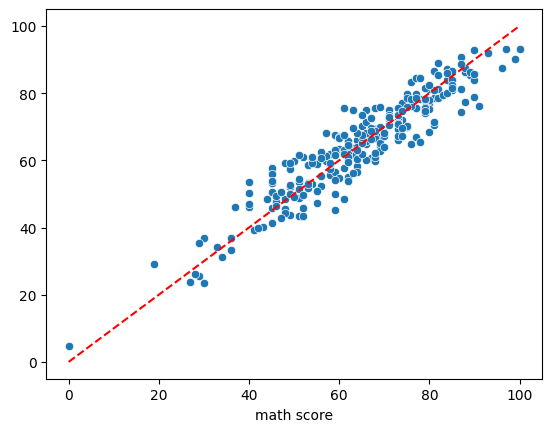

In [57]:
sns.scatterplot(x = y_test, y = y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
'r--')